# Graph anonymization 

## Description 

TBA 

### Various utitlity function - for drawing

In [1]:
import networkx as nx 
from Lopacity import *
from time import time
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_heatmap(data, inblack = True):
    
    full_op = np.zeros((max(degs.values())+1,max(degs.values())+1))


    for i in data: 
        for j in data:
            full_op[i][j] = data[i][j]
    
    
    plt.figure(figsize=(10,10))
    if inblack:
        heatmap = plt.pcolor(full_op, cmap=plt.cm.binary, alpha=0.8)
    else:
        heatmap = plt.pcolor(full_op, cmap=plt.cm.Reds, alpha=0.8)

    for y in range(full_op.shape[0]):
        for x in range(full_op.shape[1]):
            col = full_op[y, x]
            if col < 0.5: 
                col = 0.0
            else:
                col = 1.0
            col = (col, col, col)
            plt.text(x + 0.5, y + 0.5, '%.2f' % full_op[y, x],
                     horizontalalignment='center',
                     verticalalignment='center', color = col
                     )
    plt.pause(1)
    plt.colorbar(heatmap)
    plt.show()

fin_results = {}
    

### Input graph

First set your input graph, it will be used for all different anonymization techinques 

By the default we use Erdos - Renyi generated random graph or predefined karate_club graph

In [51]:
# Example graph 
#g = nx.karate_club_graph()
g = nx.erdos_renyi_graph(n=30, p=0.2)

# Init graph 
degs = g.degree(g)
deg_count, opacity = init(g, degs)
# Prepare inverted opacity matrix:
inv_opacity = {}

### Input parametrs 

Here we specifiy the Lopacity parametrs 
Desciption - TBA

In [41]:
L = 2
theta = 0.5

### Lopacity - original

In the original method interates through all the edges to find the best possible edge for removal.

  - Use function parameter mode = 'all'

Warning: This implementation is only for demonstration,  is not efficent and can be really slow. 

In [62]:
t1 = time()
result_loall = anonimize_lopacity(g=g, L=L, theta=theta, mode='all')
print("Total time "+ str(time()-t1))

# Storing results:
g1 = result_loall['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['lop_all'] = [time()-t1, dist]



Best edge to remove:  (1, 6)
Is the decision is random ? True
Best edge to remove:  (2, 28)
Is the decision is random ? True
Best edge to remove:  (9, 19)
Is the decision is random ? True
Best edge to remove:  (15, 27)
Is the decision is random ? False
Best edge to remove:  (16, 19)
Is the decision is random ? False
Best edge to remove:  (18, 23)
Is the decision is random ? True
Best edge to remove:  (4, 18)
Is the decision is random ? True
Best edge to remove:  (4, 20)
Is the decision is random ? True
Best edge to remove:  (4, 15)
Is the decision is random ? True
Best edge to remove:  (3, 23)
Is the decision is random ? True
Best edge to remove:  (13, 25)
Is the decision is random ? True
Best edge to remove:  (24, 29)
Is the decision is random ? True
Best edge to remove:  (14, 27)
Is the decision is random ? True
Best edge to remove:  (9, 17)
Is the decision is random ? True
Best edge to remove:  (3, 4)
Is the decision is random ? True
Best edge to remove:  (19, 29)
Is the decision is

As we can see, most of the decision that method is making are random. 

To improve this method we can use inverted index and find what are the edges that have opacity value higher that theta.

### Lopacity - with inverted index with max opacity

Here we consider edges that can pottentially effect on cells with maximum opacity value

  - Use function parameter mode = 'max'

Warning: This implementation is only for demonstration,  is not efficent and can be really slow. 



In [53]:
t1 = time()
result_lomax = anonimize_lopacity(g=g, L=L, theta=theta, mode='max')
print("Total time "+ str(time()-t1))

# Storing results:
g1 = result_lomax['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['lop_max'] = [time()-t1, dist]


Best edge to remove:  (2, 9)
Is the decision is random ? True
Best edge to remove:  (15, 27)
Is the decision is random ? False
Best edge to remove:  (6, 1)
Is the decision is random ? True
Best edge to remove:  (16, 21)
Is the decision is random ? True
Best edge to remove:  (28, 2)
Is the decision is random ? False
Best edge to remove:  (22, 21)
Is the decision is random ? True
Best edge to remove:  (1, 10)
Is the decision is random ? True
Best edge to remove:  (21, 12)
Is the decision is random ? True
Best edge to remove:  (10, 22)
Is the decision is random ? True
Best edge to remove:  (1, 8)
Is the decision is random ? True
Best edge to remove:  (1, 27)
Is the decision is random ? True
Best edge to remove:  (18, 19)
Is the decision is random ? False
Best edge to remove:  (22, 1)
Is the decision is random ? True
Best edge to remove:  (8, 19)
Is the decision is random ? True
Best edge to remove:  (14, 28)
Is the decision is random ? True
Best edge to remove:  (10, 26)
Is the decision i

The usage of inverted index highly benefit the original method, not only **time**, but also in reducing **distortion**. 

The next step would be to consider all edges that can reduce opacity matrix in cell with values higher $\theta$, not only the maximum. 

### Lopacity - with inverted index with opacity > $\theta$

Here we consider edges that can pottentially effect on cells in opacity matrix with values higher than theta.

  - Use function parameter mode = 'val'

**Warning**: This implementation is only for demonstration,  is not efficent and can be really slow. 


In [63]:
t1 = time()
result_loval = anonimize_lopacity(g=g, L=L, theta=theta, mode='val')
t2 = time()
print("Total time "+ str(t2-t1))

# Storing results:
g1 = result_loval['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['lop_val'] = [time()-t1, dist]


Best edge to remove:  (16, 21)
Is the decision is random ? True
Best edge to remove:  (0, 6)
Is the decision is random ? True
Best edge to remove:  (15, 27)
Is the decision is random ? False
Best edge to remove:  (9, 19)
Is the decision is random ? True
Best edge to remove:  (2, 28)
Is the decision is random ? True
Best edge to remove:  (8, 1)
Is the decision is random ? True
Best edge to remove:  (1, 6)
Is the decision is random ? True
Best edge to remove:  (11, 3)
Is the decision is random ? True
Best edge to remove:  (5, 21)
Is the decision is random ? True
Best edge to remove:  (16, 26)
Is the decision is random ? True
Best edge to remove:  (3, 4)
Is the decision is random ? True
Best edge to remove:  (23, 28)
Is the decision is random ? True
Best edge to remove:  (13, 12)
Is the decision is random ? True
Best edge to remove:  (20, 17)
Is the decision is random ? True
Best edge to remove:  (25, 29)
Is the decision is random ? True
Best edge to remove:  (24, 29)
Is the decision is r

Considering all violated edges doesn't give any positive improvment.

## Lopacity - intersection method (static score function)

Since we build the inverted index for opacity matrix, we know which edges could potentinally reduce opacity value in a specific cell. 

Note that edge could also reduce opacity value in many cells of the opacity cells. So, it would make sense to remove edges that are presented in many shortest paths.  

But how to decide what edge to remove ? What edge is more important ? To answer this question we use a score function: 
   
   Opacity matrix has cells (degree - pairs), each cell has some number of  candidates (vertex - pairs), and each vertex-pair has some number of shortest path that connect these vertices. 
   
   
   Static naive function:

   **score(edge) = $|cells|^3*|cand|^2*|short\_path| $**, 

|cells| - to how many degree-pairs could the edge effect

|cand| - to how many vertex-pairs could the edge effect

|short\_path| - in how many shortest path the edge is presented


### Lopacity - intersection method (static score function) with inverted index with opacity > $\theta$

  - Run intersect_anonimize
  - Use function parameter *mode* = 'val' or 'max'

First we run the function considering all edges with opacity > $\theta$

In [64]:
t1 = time()
result_itval = intersect_anonimize(g, L, theta, mode = 'val')
tot_time = time()-t1
print("Total time "+ str(tot_time))

# Storing results:
g1 = result_itval['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['int_val'] = [tot_time, dist]


Edges removed: 
[(1, 28), (1, 27), (10, 26), (1, 22), (3, 27), (3, 21), (4, 22), (19, 29), (1, 18), (8, 19), (6, 1), (13, 25), (10, 21), (8, 24), (1, 13), (9, 19), (9, 25), (18, 19), (14, 29), (3, 23), (4, 23), (11, 25), (23, 28), (21, 14), (27, 19), (22, 16), (5, 21), (3, 13), (24, 29), (14, 28), (13, 18), (17, 27), (3, 4), (17, 14), (6, 20), (19, 27), (7, 19), (15, 27), (12, 21), (11, 3), (8, 22), (4, 18), (18, 23), (1, 11), (21, 16), (4, 20), (19, 16), (9, 17), (17, 24), (16, 26), (19, 18), (8, 1), (11, 1), (12, 22), (21, 22)]
Finished
Total time 0.11592411994934082
Distortion 0.6842105263157895


This method is reducing  **time**, but in terms of  **distortion**, it doesn't provide best result.

### Lopacity - intersection method (static score function) with inverted index with max opacity

Here we consider edges that can pottentially effect on cells with maximum opacity value

  - Use function parameter mode = 'max'



In [65]:
t1 = time()
result_itmax = intersect_anonimize(g, L, theta, mode = 'max')
tot_time = time()-t1
print("Total time "+ str(tot_time))

# Storing results:
g1 = result_itmax['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['int_max'] = [tot_time, dist]


Edges removed: 
[(27, 19), (1, 22), (19, 16), (19, 8), (28, 2), (22, 21), (9, 19), (1, 8), (7, 19), (6, 1), (1, 18), (21, 22)]
Edges removed: 
[(10, 22), (1, 10), (21, 10), (21, 16), (16, 22), (12, 22)]
Edges removed: 
[(1, 27)]
Edges removed: 
[(3, 27)]
Edges removed: 
[(19, 29)]
Edges removed: 
[(3, 21)]
Edges removed: 
[(1, 28)]
Edges removed: 
[(3, 13)]
Edges removed: 
[(15, 27)]
Edges removed: 
[(16, 26)]
Edges removed: 
[(11, 25)]
Finished
Total time 0.5033130645751953
Distortion 0.34210526315789475


As in the lopacity method we get better result in terms of  **distortion**.

## Lopacity - intersection method (dynamic score function)

One of the problem of a simple static function is that is may delete, for example method might remove an edge that will reduce cell, that is already less that theta. 

   Dynamic score function:

   **score(edge) = $|cells|^3*|cand|^2*|short\_path| $**, 
  
   if one of the path between vertex-pair in the specific degree-pair is already broken - we reduce the score 

* |cells| - to how many degree-pairs could the edge effect

* |cand| - to how many vertex-pairs could the edge effect

* |short\_path| - in how many shortest path the edge is presented



### Lopacity - intersection method (dynamic score function) with inverted index with opacity > $\theta$

  - Run intersect_anonimize
  - Use function parameter *mode* = 'val' or 'max'
  - Use function parameter dynamic_score = True

First we run the function considering all edges with opacity > $\theta$

In [66]:
t1 = time()
result_dynval = intersect_anonimize(g, L, theta, score='dyn', mode = 'val')
tot_time = time()-t1
print("Total time "+ str(tot_time))

# Storing results:
g1 = result_dynval['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['dyn_val'] = [tot_time, dist]



Edges removed: 
{(14, 17), (15, 20), (24, 17), (18, 4), (17, 20), (27, 17), (1, 6), (1, 11), (23, 7), (10, 8), (8, 24), (19, 29), (16, 22), (7, 19), (1, 28), (15, 4), (21, 12), (20, 4), (27, 1), (3, 23), (5, 21), (16, 19), (2, 28), (22, 12), (4, 15), (6, 13), (14, 21), (19, 8), (26, 24), (3, 11), (23, 3), (19, 18), (11, 10), (12, 13), (19, 7), (22, 16), (17, 24), (21, 5), (22, 10), (14, 28), (5, 17), (13, 6), (16, 26), (9, 2), (6, 1), (6, 20), (20, 15), (11, 25), (26, 19), (23, 18), (29, 19), (28, 29), (27, 15), (3, 21), (4, 22), (18, 1), (13, 12), (13, 25), (28, 23), (8, 10), (28, 2), (17, 5), (25, 29), (27, 19), (22, 4), (29, 25), (14, 29), (16, 5), (24, 29), (5, 16), (1, 18), (0, 6), (25, 13), (13, 18), (20, 6), (21, 10), (26, 10), (22, 1), (3, 4), (28, 25), (27, 3), (5, 9), (29, 28), (10, 11), (19, 26), (24, 26), (16, 21), (21, 16), (26, 16), (2, 9), (27, 14), (8, 1), (4, 23), (11, 1), (9, 17), (17, 14), (7, 23), (22, 21), (18, 13), (25, 11), (1, 13), (28, 14), (10, 1), (6, 12), (2

### Lopacity - intersection method (dynamic score function) with inverted index with  max opacity 

In [57]:
t1 = time()
result_dynmax = intersect_anonimize(g, L, theta, score='dyn', mode = 'max')
tot_time = time()-t1
print("Total time "+ str(tot_time))

# Storing results:
g1 = result_dynmax['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['dyn_max'] = [tot_time, dist]


Edges removed: 
{(1, 22), (2, 9), (19, 16), (21, 22), (1, 27), (27, 19), (1, 18), (0, 6), (8, 19), (1, 8), (1, 28)}
Edges removed: 
{(10, 22), (12, 22), (21, 16)}
Edges removed: 
{(19, 29)}
Edges removed: 
{(3, 27)}
Edges removed: 
{(3, 21)}
Edges removed: 
{(14, 28)}
Edges removed: 
{(1, 6)}
Edges removed: 
{(18, 19), (5, 21)}
Edges removed: 
{(23, 7)}
Edges removed: 
{(17, 27)}
Edges removed: 
{(17, 24)}
Edges removed: 
{(23, 28)}
Edges removed: 
{(9, 25)}
Finished
Total time 0.5869379043579102
Distortion 0.34210526315789475


In [58]:
t1 = time()
result_optmax = intersect_anonimize(g, L, theta, score='opt', mode = 'max')
tot_time = time()-t1
print("Total time "+ str(tot_time))

# Storing results:
g1 = result_optmax['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['opt_max'] = [tot_time, dist]


Edges removed: 
[(2, 9)]
Edges removed: 
[(28, 2)]
Edges removed: 
[(7, 19)]
Edges removed: 
[(0, 6)]
Edges removed: 
[(15, 27)]
Edges removed: 
[(21, 22)]
Edges removed: 
[(10, 21)]
Edges removed: 
[(16, 21)]
Edges removed: 
[(21, 12)]
Edges removed: 
[(1, 8)]
Edges removed: 
[(1, 27)]
Edges removed: 
[(1, 18)]
Edges removed: 
[(29, 28)]
Edges removed: 
[(8, 19)]
Edges removed: 
[(1, 13)]
Edges removed: 
[(26, 19)]
Edges removed: 
[(25, 28)]
Edges removed: 
[(18, 23)]
Edges removed: 
[(14, 28)]
Edges removed: 
[(19, 27)]
Edges removed: 
[(1, 10)]
Edges removed: 
[(22, 4)]
Edges removed: 
[(29, 19)]
Edges removed: 
[(6, 20)]
Edges removed: 
[(5, 16)]
Edges removed: 
[(4, 23)]
Edges removed: 
[(11, 3)]
Edges removed: 
[(1, 28)]
Finished
Total time 1.2275309562683105
Distortion 0.3684210526315789


In [59]:
t1 = time()
result_optval = intersect_anonimize(g, L, theta, score='opt', mode = 'val')
tot_time = time()-t1
print("Total time "+ str(tot_time))

# Storing results:
g1 = result_optval['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['opt_val'] = [tot_time, dist]



Edges removed: 
[(4, 23)]
Edges removed: 
[(1, 28)]
Edges removed: 
[(3, 23)]
Edges removed: 
[(4, 22)]
Edges removed: 
[(1, 27)]
Edges removed: 
[(6, 20)]
Edges removed: 
[(14, 28)]
Edges removed: 
[(6, 1)]
Edges removed: 
[(13, 18)]
Edges removed: 
[(18, 19)]
Edges removed: 
[(8, 24)]
Edges removed: 
[(1, 18)]
Edges removed: 
[(3, 4)]
Edges removed: 
[(21, 22)]
Edges removed: 
[(5, 21)]
Edges removed: 
[(16, 21)]
Edges removed: 
[(8, 19)]
Edges removed: 
[(19, 29)]
Edges removed: 
[(27, 19)]
Edges removed: 
[(2, 9)]
Edges removed: 
[(1, 10)]
Edges removed: 
[(10, 22)]
Edges removed: 
[(12, 22)]
Finished
Total time 1.1835219860076904
Distortion 0.3026315789473684


In [74]:
t1 = time()
result_optval2 = intersect_anonimize(g, L, theta, score='opt2', mode = 'val')
tot_time = time()-t1
print("Total time "+ str(tot_time))


g1 = result_optval2['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['opt_val2'] = [tot_time, dist]




Edges removed: 
[(4, 23)]
Edges removed: 
[(1, 28)]
Edges removed: 
[(3, 23)]
Edges removed: 
[(4, 22)]
Edges removed: 
[(1, 27)]
Edges removed: 
[(6, 20)]
Edges removed: 
[(14, 28)]
Edges removed: 
[(6, 1)]
Edges removed: 
[(13, 18)]
Edges removed: 
[(18, 19)]
Edges removed: 
[(8, 24)]
Edges removed: 
[(1, 18)]
Edges removed: 
[(3, 4)]
Edges removed: 
[(21, 22)]
Edges removed: 
[(5, 21)]
Edges removed: 
[(16, 21)]
Edges removed: 
[(19, 29)]
Edges removed: 
[(27, 19)]
Edges removed: 
[(9, 19)]
Edges removed: 
[(1, 22)]
Edges removed: 
[(10, 21)]
Edges removed: 
[(12, 22)]
Edges removed: 
[(1, 8)]
Finished
Total time 1.2539680004119873
Distortion 0.3026315789473684


In [70]:
t1 = time()
result_optmax2 = intersect_anonimize(g, L, theta, score='opt2', mode = 'max')
tot_time = time()-t1
print("Total time "+ str(tot_time))


g1 = result_optmax2['new_graph']
dist = (g.number_of_edges() - g1.number_of_edges())/g.number_of_edges()
print("Distortion "+ str(dist))
fin_results['opt_max2'] = [tot_time, dist]





Edges removed: 
[(28, 2)]
Edges removed: 
[(15, 27)]
Edges removed: 
[(21, 22)]
Edges removed: 
[(9, 19)]
Edges removed: 
[(16, 21)]
Edges removed: 
[(10, 21)]
Edges removed: 
[(21, 12)]
Edges removed: 
[(6, 1)]
Edges removed: 
[(1, 18)]
Edges removed: 
[(8, 19)]
Edges removed: 
[(27, 19)]
Edges removed: 
[(22, 4)]
Edges removed: 
[(28, 29)]
Edges removed: 
[(27, 17)]
Edges removed: 
[(1, 13)]
Edges removed: 
[(1, 27)]
Edges removed: 
[(14, 27)]
Edges removed: 
[(19, 26)]
Edges removed: 
[(18, 19)]
Edges removed: 
[(4, 3)]
Edges removed: 
[(8, 24)]
Edges removed: 
[(10, 26)]
Edges removed: 
[(16, 19)]
Edges removed: 
[(20, 17)]
Edges removed: 
[(21, 14)]
Edges removed: 
[(4, 18)]
Finished
Total time 1.4623370170593262
Distortion 0.34210526315789475


## Results 

In [75]:
fin = pd.DataFrame(fin_results, index = ['time', 'dist'])
fin

,dyn_max,dyn_val,int_max,int_val,lop_all,lop_max,lop_val,opt_max,opt_max2,opt_val,opt_val2
time,0.586938,2.193462,0.503313,0.115924,73.135137,21.883124,100.780158,1.227531,1.462337,1.183522,1.253968
dist,0.342105,0.973684,0.342105,0.684211,0.736842,0.328947,0.473684,0.368421,0.342105,0.302632,0.302632


**The best models are 'dyn_max' and 'lop_max'**

# Appendix 

## Opacity matrix

In [76]:
results = result_dynmax
results2 = result_lomax
results3 = result_optval2

### Original opacity matrix

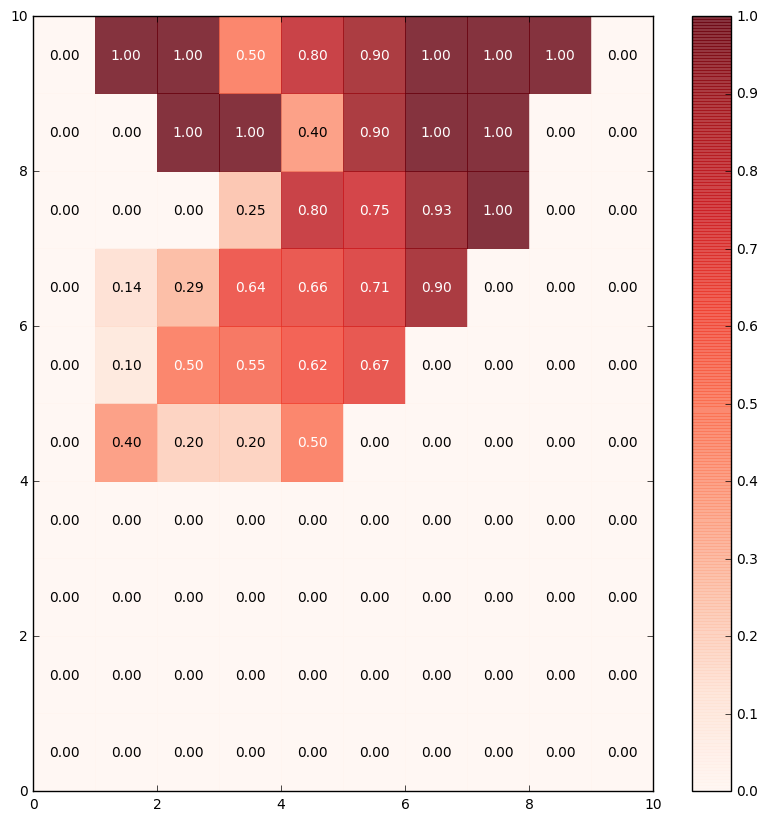

In [77]:
#{'old_opacity' 
# 'new_opacity' 
# 'new_graph' }

old_lo = results['old_opacity'] 
draw_heatmap(old_lo, inblack=False)

#### Opacity matrix lop_max 

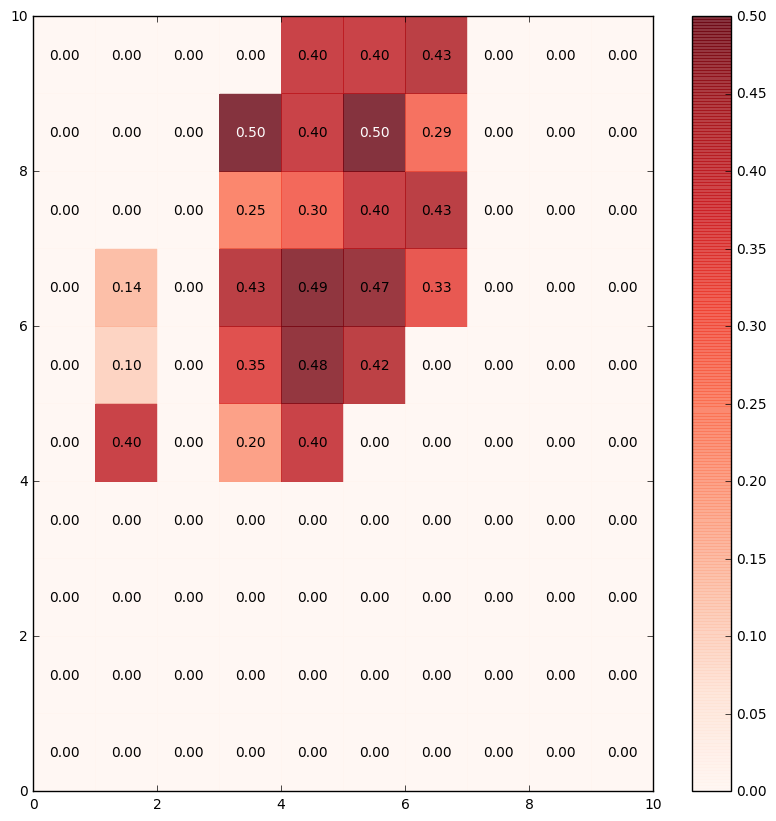

In [78]:
new_lo = results2['new_opacity'] 
draw_heatmap(new_lo, inblack=False)

#### Opacity matrix dyn_max 

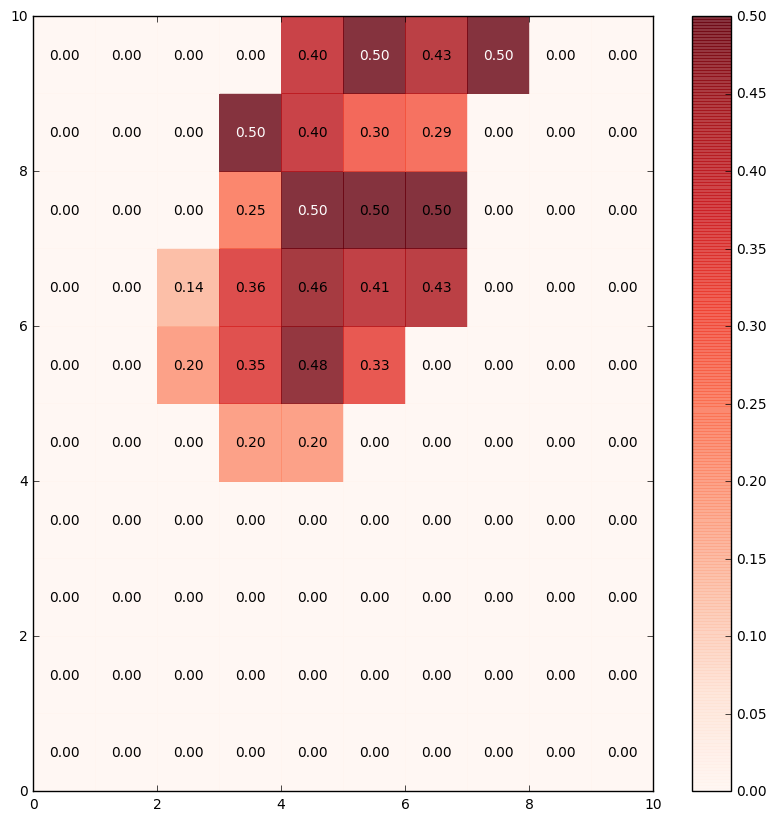

In [79]:
new_lo = results['new_opacity'] 
draw_heatmap(new_lo, inblack=False)

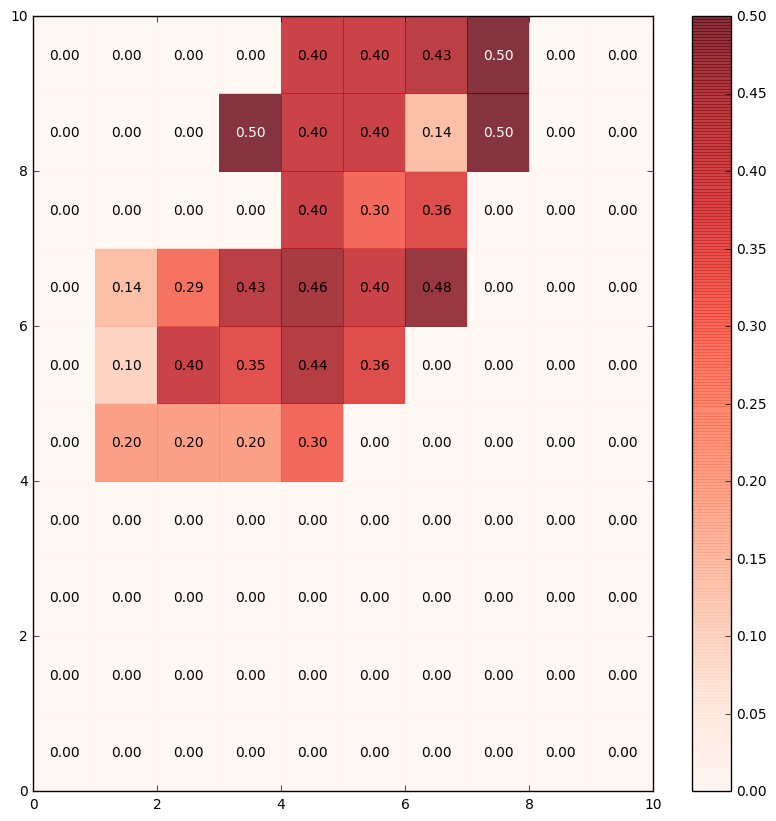

In [80]:
new_lo = results3['new_opacity'] 
draw_heatmap(new_lo, inblack=False)

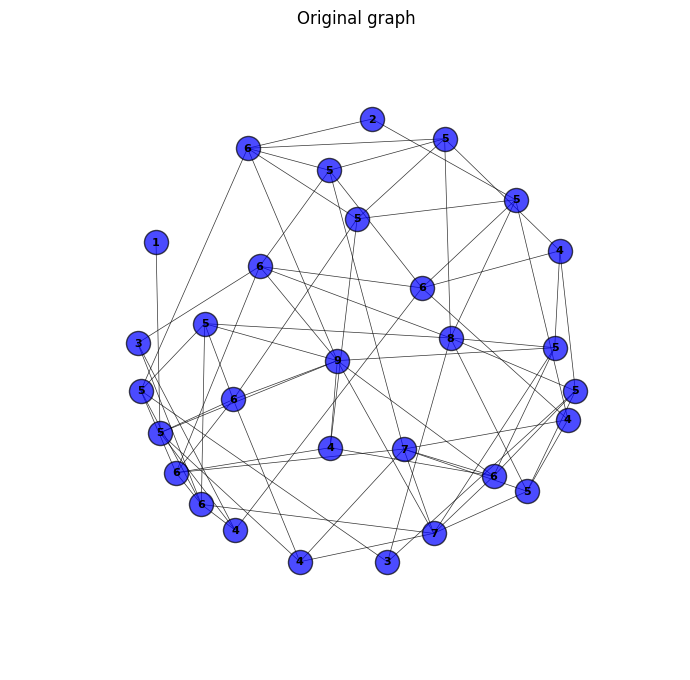

In [83]:
import ipywidgets as wg
from IPython.display import clear_output

g_hat = g.copy()
clear_output(wait=True)

fig1 = plt.figure(figsize=(8,8))
pos = nx.spring_layout(g, k=0.27, iterations=50)
nx.draw_networkx_nodes(g_hat, pos, node_size=300, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(g_hat, pos, width=0.5, alpha=0.8)
nx.draw_networkx_labels(g_hat, pos, font_size=8, font_family='sans-serif', font_weight='bold', labels=degs)


ax1 = fig1.add_subplot(111)
ax1.set_title('Original graph ')
plt.axis('off')
plt.axis('equal')
plt.show()

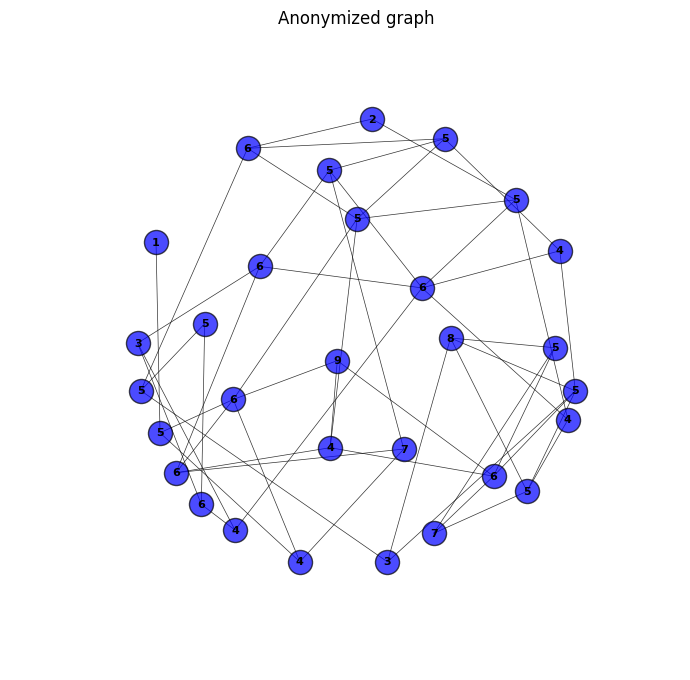

In [84]:
import ipywidgets as wg
from IPython.display import clear_output

g_hat = results3['new_graph']
clear_output(wait=True)

fig1 = plt.figure(figsize=(8,8))
#pos = nx.spring_layout(g, k=0.27, iterations=50)
nx.draw_networkx_nodes(g_hat, pos, node_size=300, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(g_hat, pos, width=0.5, alpha=0.8)
nx.draw_networkx_labels(g_hat, pos, font_size=8, font_family='sans-serif', font_weight='bold', labels=degs)


ax1 = fig1.add_subplot(111)
ax1.set_title('Anonymized graph ')
plt.axis('off')
plt.axis('equal')
plt.show()

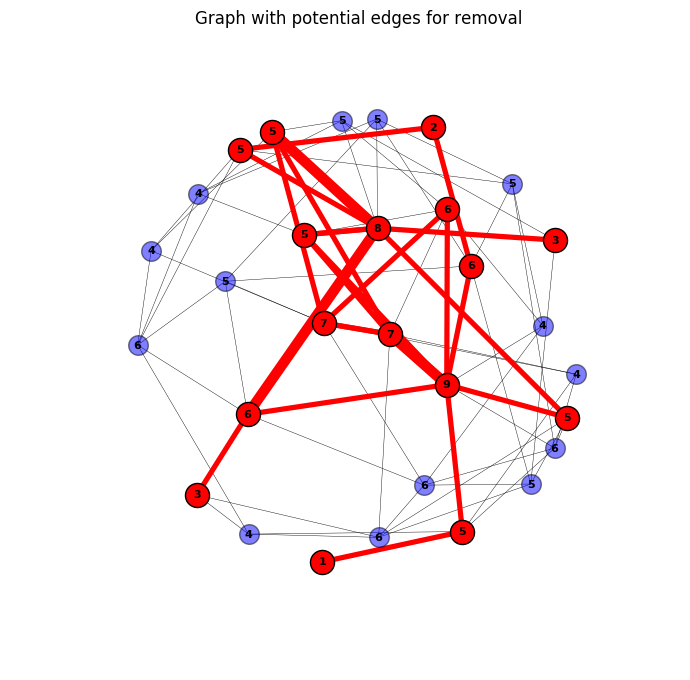

In [86]:
import ipywidgets as wg
from IPython.display import clear_output


calc_lopacity_matrix(g, L, degs, deg_count, opacity, inv_opacity)
edge_pairs_buckets = get_max_violated(g, theta, opacity, inv_opacity)
c, poten_edges = edge_to_path(g, edge_pairs_buckets)

nodes = set([])
edges = []
edges_color = []
max_len = 0
for edge in poten_edges:
    tot_len = 0
    for e in poten_edges[edge]:
        for e2 in poten_edges[edge][e]:
            tot_len += len(poten_edges[edge][e][e2])
    edges_color.append(tot_len)
    edges.append(edge)
    if max_len < tot_len:
        max_len = tot_len
    nodes.add(edge[0])
    nodes.add(edge[1]) 

for i in range(len(edges_color)):
    t1 = edges_color[i]/max_len
    edges_color[i] = t1*7.5


clear_output(wait=True)
pos = nx.spring_layout(g, k=0.27, iterations=50)
fig1 = plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(g, pos, node_size=200, node_color='blue', alpha=0.5)
nx.draw_networkx_edges(g, pos, width=[0.3 for i in range(g.number_of_edges())])
nx.draw_networkx_labels(g, pos, font_size=8, font_family='sans-serif', font_weight='bold', labels=degs)

nx.draw_networkx_nodes(g,pos,nodelist=nodes,node_color='r')
nx.draw_networkx_edges(g,pos,edgelist=edges,edge_color='r',width=edges_color)

ax1 = fig1.add_subplot(111)
ax1.set_title('Graph with potential edges for removal')
plt.axis('off')
plt.axis('equal')
plt.show()

# Step by step

### 1. Calc lopacity Matrix

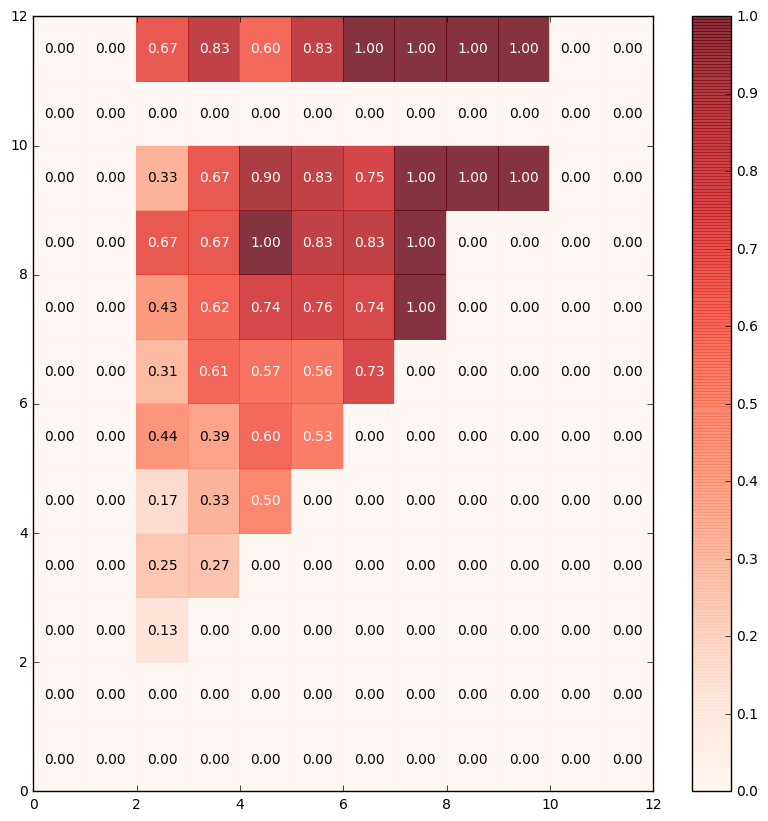

In [66]:
# Main steps:
# 1. Calcaulte L-APSP:
inv_opacity = {}
calc_lopacity_matrix(g, L, degs, deg_count, opacity, inv_opacity)
draw_heatmap(opacity, inblack=False)

### 2. Find all violated edges in a graph

In [67]:
# 2. Get all violated vertex-pairs that have the maximum opacity value
edge_pairs_buckets = get_all_violated(g, theta, opacity, inv_opacity)
c, poten_edges = edge_to_path(g, edge_pairs_buckets)

In [20]:
nodes = set([])
edges = []
edges_color = []
max_len = 0
for edge in poten_edges:
    tot_len = 0
    for e in poten_edges[edge]:
        for e2 in poten_edges[edge][e]:
            tot_len += len(poten_edges[edge][e][e2])
    edges_color.append(tot_len)
    edges.append(edge)
    if max_len < tot_len:
        max_len = tot_len
    nodes.add(edge[0])
    nodes.add(edge[1]) 

for i in range(len(edges_color)):
    t1 = edges_color[i]/max_len
    edges_color[i] = t1*7.5

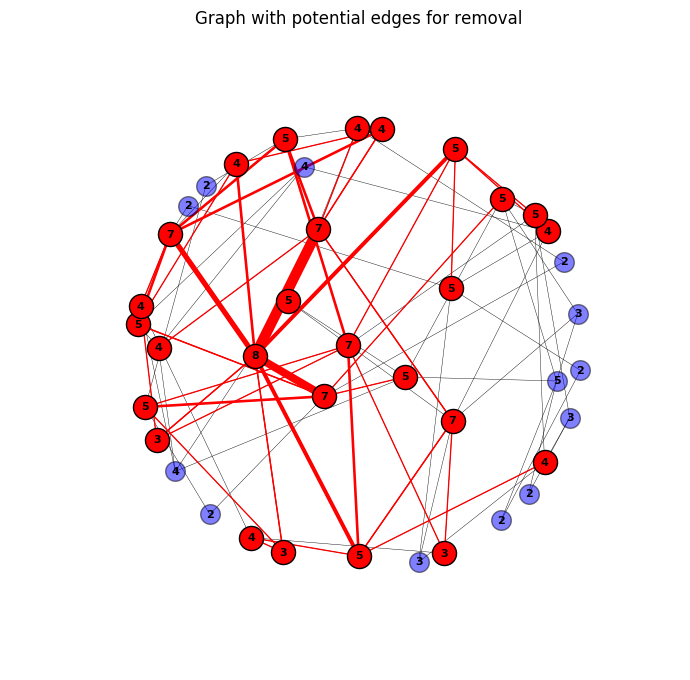

In [21]:
import ipywidgets as wg
from IPython.display import clear_output

clear_output(wait=True)
pos = nx.spring_layout(g, k=0.27, iterations=50)
fig1 = plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(g, pos, node_size=200, node_color='blue', alpha=0.5)
nx.draw_networkx_edges(g, pos, width=[0.3 for i in range(g.number_of_edges())])
nx.draw_networkx_labels(g, pos, font_size=8, font_family='sans-serif', font_weight='bold', labels=degs)

nx.draw_networkx_nodes(g,pos,nodelist=nodes,node_color='r')
nx.draw_networkx_edges(g,pos,edgelist=edges,edge_color='r',width=edges_color)

ax1 = fig1.add_subplot(111)
ax1.set_title('Graph with potential edges for removal')
plt.axis('off')
plt.axis('equal')
plt.show()

### Find best edge (edges) to remove

In [68]:
rem_edges = get_edges_intersect_opt(g, edge_pairs_buckets, verbose=True)
print("Best to remove: ")
print(rem_edges)

Top candidates for removal: 
[((15, 35), {0: {9: [0]}, 1: {22: [0]}, 2: {31: [0]}, 3: {23: [0]}, 4: {5: [0]}, 17: {3: [0]}, 'score': [6, -7], 12: {13: [1]}}), ((9, 31), {2: {21: [0]}, 3: {15: [0]}, 4: {2: [0], 7: [0]}, 7: {4: [0]}, 8: {3: [0]}, 'score': [6, -7], 18: {3: [0]}}), ((8, 27), {3: {1: [0], 14: [0]}, 9: {3: [0]}, 10: {3: [0]}, 11: {2: [0]}, 12: {3: [0]}, 'score': [5, -6]}), ((28, 35), {1: {16: [1]}, 2: {27: [2], 5: [0]}, 4: {10: [1], 19: [0], 20: [0]}, 8: {6: [0]}, 'score': [5, -9], 18: {6: [0]}, 15: {4: [0]}}), ((7, 33), {1: {5: [0]}, 2: {10: [0]}, 'score': [4, -4], 4: {1: [0]}, 5: {2: [0]}}), ((11, 31), {0: {6: [0]}, 2: {2: [0]}, 3: {10: [0]}, 4: {11: [0]}, 'score': [4, -4]}), ((27, 8), {1: {9: [0], 12: [0]}, 2: {29: [0]}, 'score': [4, -5], 10: {0: [0]}, 9: {0: [0]}}), ((4, 31), {0: {0: [0], 3: [2]}, 2: {24: [0], 9: [1]}, 3: {2: [0]}, 7: {0: [0]}, 'score': [4, -7], 12: {4: [0]}}), ((9, 22), {2: {20: [0]}, 3: {8: [1], 13: [0]}, 4: {0: [1]}, 5: {3: [0]}, 8: {1: [0], 5: [0]}, 

In [69]:
g_hat = g.copy()
g_hat.remove_edges_from(rem_edges)

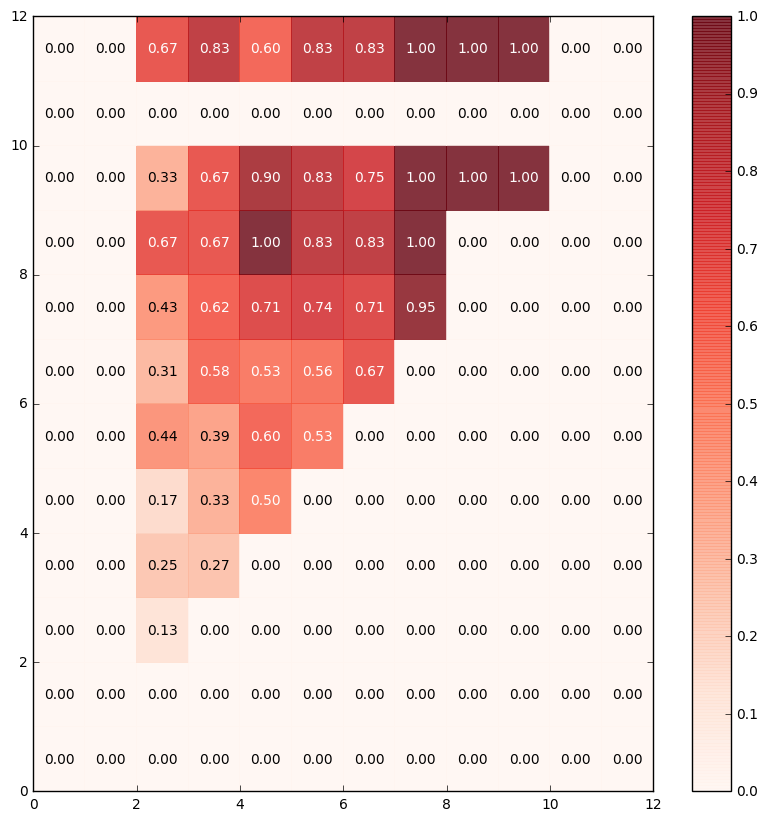

In [70]:
# Main steps:
# 1. Calcaulte L-APSP:
inv_opacity = {}
calc_lopacity_matrix(g_hat, L, degs, deg_count, opacity, inv_opacity)
draw_heatmap(opacity, inblack=False)

In [71]:
# 2. Get all violated vertex-pairs that have the maximum opacity value
edge_pairs_buckets = get_all_violated(g_hat, theta, opacity, inv_opacity)
rem_edges = get_edges_intersect_opt(g, edge_pairs_buckets, verbose=True)
print("Best to remove: ")
print(rem_edges)


Top candidates for removal: 
[((9, 31), {1: {21: [0]}, 2: {15: [0]}, 3: {2: [0], 6: [0]}, 17: {3: [0]}, 6: {4: [0]}, 7: {3: [0]}, 'score': [6, -7]}), ((8, 27), {2: {1: [0], 14: [0]}, 'score': [5, -6], 8: {3: [0]}, 9: {3: [0]}, 10: {2: [0]}, 11: {3: [0]}}), ((28, 35), {0: {16: [1]}, 1: {27: [2], 5: [0]}, 3: {9: [1], 18: [0], 19: [0]}, 17: {6: [0]}, 7: {6: [0]}, 'score': [5, -9], 14: {4: [0]}}), ((7, 33), {0: {5: [0]}, 1: {10: [0]}, 3: {1: [0]}, 4: {2: [0]}, 'score': [4, -4]}), ((27, 8), {0: {9: [0], 12: [0]}, 1: {29: [0]}, 'score': [4, -5], 8: {0: [0]}, 9: {0: [0]}}), ((9, 22), {1: {20: [0]}, 2: {8: [1], 13: [0]}, 3: {0: [1]}, 4: {3: [0]}, 7: {1: [0], 5: [0]}, 'score': [4, -8], 12: {1: [0]}}), ((11, 31), {1: {2: [0]}, 2: {10: [0]}, 3: {10: [0]}, 'score': [3, -3]}), ((22, 9), {1: {28: [0]}, 3: {6: [0]}, 4: {0: [0]}, 'score': [3, -3]}), ((3, 35), {1: {19: [0]}, 2: {27: [0]}, 'score': [3, -3], 14: {1: [0]}}), ((7, 39), {0: {6: [0], 23: [0]}, 11: {0: [0]}, 4: {4: [0]}, 'score': [3, -4]}), (

In [73]:
g_hat.remove_edges_from(rem_edges)

In [9]:
# 3. Get best edges for removal
rem_edges = get_edges_intersect(g, edge_pairs_buckets, verbose=True)

Top  candidates for removal: 
[((2, 27), {7: {8: [0], 1: [0], 4: [1], 5: [1]}, 8: {4: [0], 5: [0], 6: [0], 7: [1], 9: [1], 10: [0], 11: [0], 12: [0]}, 9: {7: [0]}, 10: {3: [0]}, 'score': 917294284800.0, 13: {0: [0]}}), ((2, 31), {3: {0: [1], 1: [1], 2: [1]}, 5: {0: [0]}, 7: {6: [0]}, 8: {8: [1], 5: [1], 7: [2]}, 9: {5: [1]}, 'score': 103582531584.0, 12: {0: [0], 1: [0]}}), ((24, 33), {0: {14: [0]}, 1: {3: [0]}, 2: {1: [1]}, 6: {0: [0]}, 'score': 7077888.0, 11: {0: [0]}}), ((2, 28), {0: {7: [0]}, 8: {6: [1]}, 10: {1: [1]}, 'score': 2304000.0, 9: {9: [0], 4: [0]}}), ((2, 10), {8: {7: [0]}, 9: {1: [0], 3: [0]}, 10: {0: [0]}, 'score': 2304000.0, 7: {5: [0]}}), ((2, 24), {0: {5: [0]}, 9: {2: [0]}, 10: {1: [0]}, 11: {0: [0]}, 'score': 512000.0}), ((13, 27), {8: {14: [0]}, 9: {6: [2]}, 10: {4: [0]}, 'score': 512000.0, 7: {7: [0]}}), ((10, 2), {0: {5: [0], 7: [0]}, 10: {3: [0]}, 'score': 147456.0, 5: {0: [0]}}), ((2, 3), {8: {0: [0], 8: [0]}, 10: {2: [0]}, 'score': 147456.0, 7: {2: [0]}}), ((2

In [72]:
rem_edges

[(9, 31)]

In [34]:
len(rem_edges)

9

In [35]:
rem_edges_static = rem_edges

In [36]:
rem_edges_dyn = get_edges_intersect_dynamic(g, edge_pairs_buckets)

In [37]:
rem_edges_dyn

{(4, 37), (11, 37), (12, 40), (31, 32), (31, 46), (43, 40)}

In [38]:
len(rem_edges_dyn)

6

In [39]:
g_hat = g.copy()

In [40]:
g_hat.remove_edges_from(rem_edges_static)

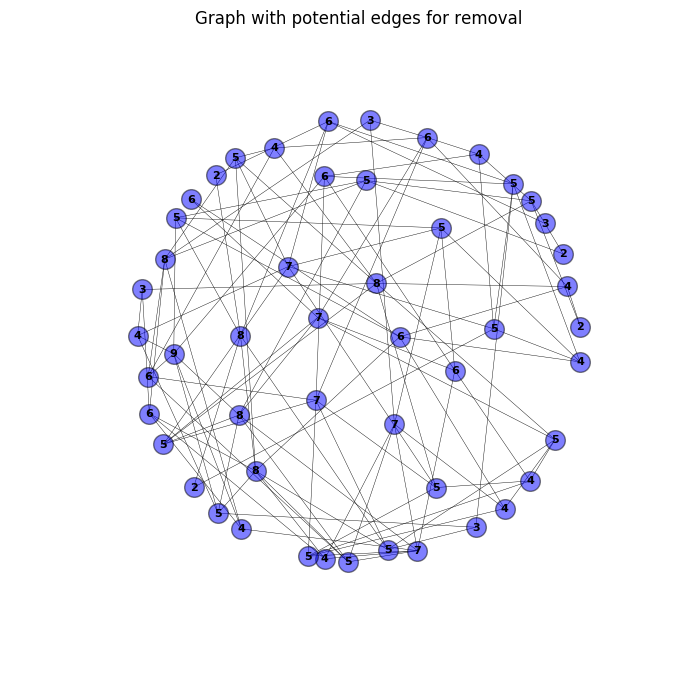

In [41]:
import ipywidgets as wg
from IPython.display import clear_output

clear_output(wait=True)
#pos = nx.spring_layout(g, k=0.27, iterations=50)
fig1 = plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(g_hat, pos, node_size=200, node_color='blue', alpha=0.5)
nx.draw_networkx_edges(g_hat, pos, width=[0.3 for i in range(g.number_of_edges())])
nx.draw_networkx_labels(g_hat, pos, font_size=8, font_family='sans-serif', font_weight='bold', labels=degs)

#nx.draw_networkx_nodes(g_hat,pos,nodelist=nodes,node_color='r')
#nx.draw_networkx_edges(g_hat,pos,edgelist=edges,edge_color='r',width=edges_color)

ax1 = fig1.add_subplot(111)
ax1.set_title('Graph with potential edges for removal')
plt.axis('off')
plt.axis('equal')
plt.show()

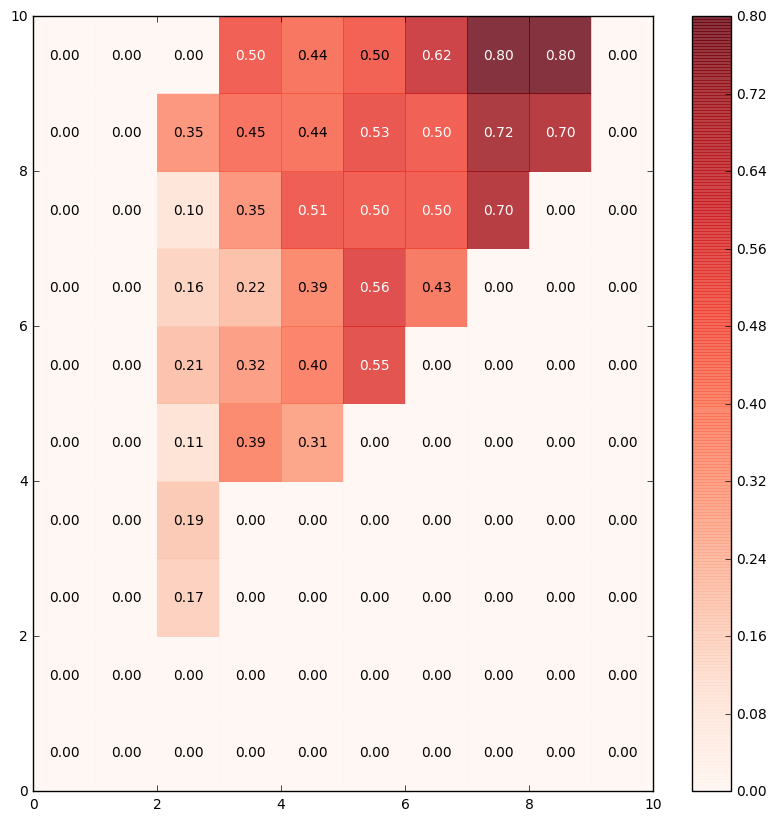

In [42]:
# Main steps:
# 1. Calcaulte L-APSP:
inv_opacity = {}
calc_lopacity_matrix(g_hat, L, degs, deg_count, opacity, inv_opacity)
draw_heatmap(opacity, inblack=False)

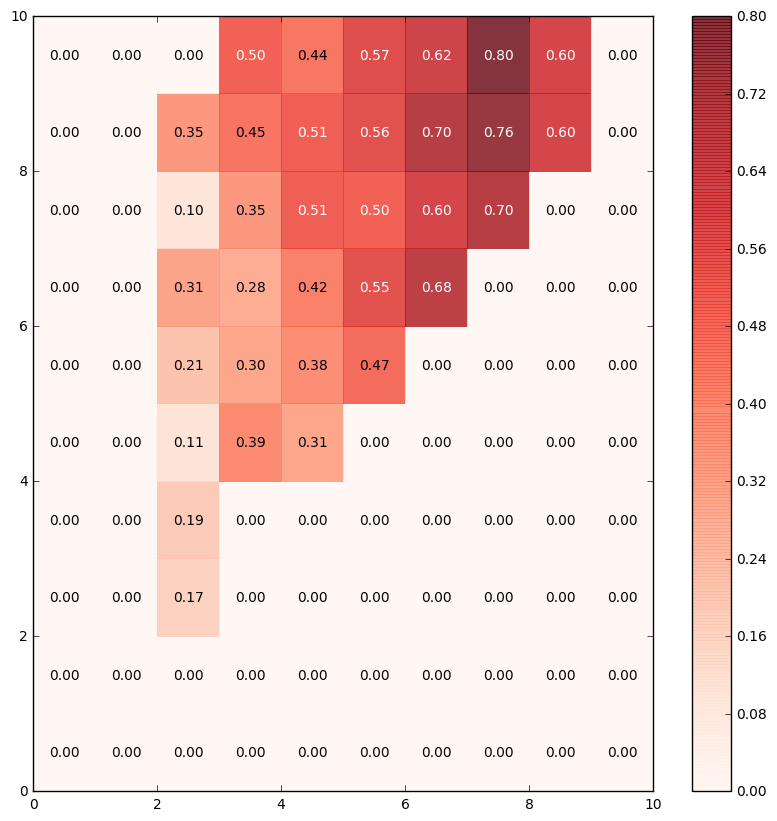

In [43]:
# Main steps:
# 1. Calcaulte L-APSP:
inv_opacity = {}
g_hat = g.copy()
g_hat.remove_edges_from(rem_edges_dyn)
calc_lopacity_matrix(g_hat, L, degs, deg_count, opacity, inv_opacity)
draw_heatmap(opacity, inblack=False)

In [24]:
opacity.max().max()

0.69999999999999996

In [23]:
# 2. Get all violated vertex-pairs that have the maximum opacity value
edge_pairs_buckets = get_all_violated(g_hat, theta, opacity, inv_opacity)
c, poten_edges = edge_to_path(g_hat, edge_pairs_buckets)
rem_edges_dyn = get_edges_intersect_dynamic(g_hat, edge_pairs_buckets)
print(rem_edges_dyn)

IndexError: list index out of range

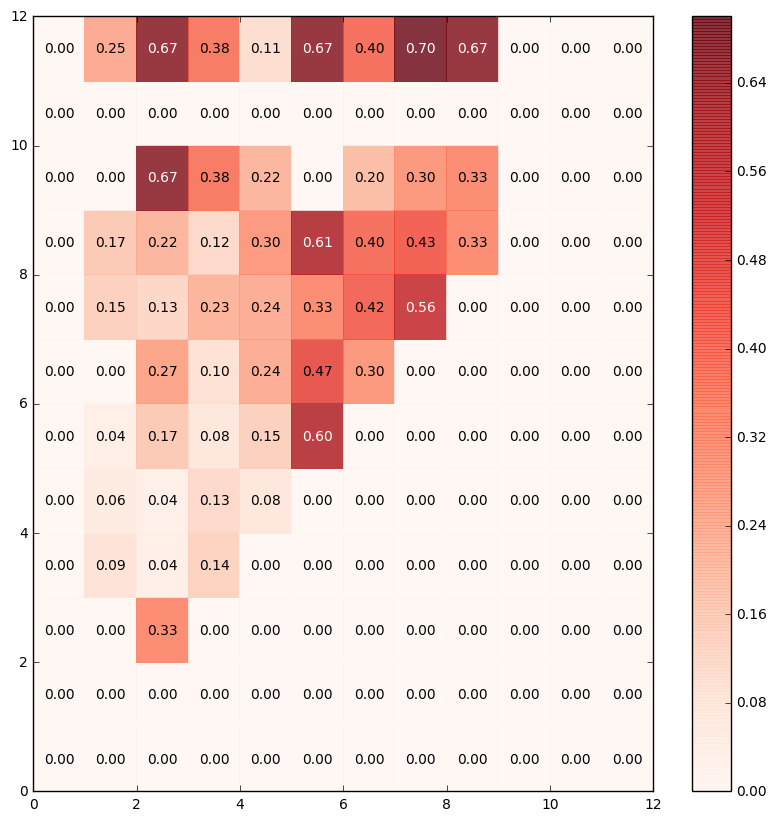

In [22]:
inv_opacity = {}
g_hat.remove_edges_from(rem_edges_dyn)
calc_lopacity_matrix(g_hat, L, degs, deg_count, opacity, inv_opacity)
draw_heatmap(opacity, inblack=False)

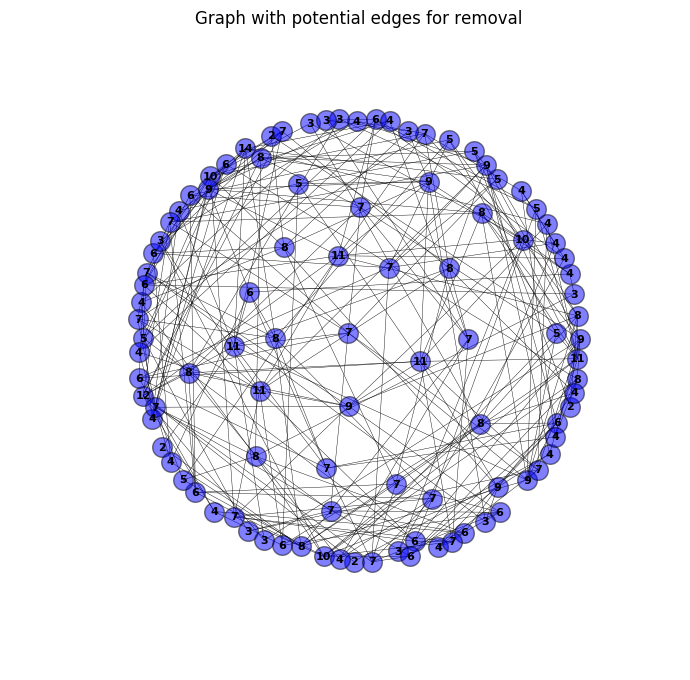

In [176]:
import ipywidgets as wg
from IPython.display import clear_output

clear_output(wait=True)
pos = nx.spring_layout(g_hat, k=0.27, iterations=50)
fig1 = plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(g_hat, pos, node_size=200, node_color='blue', alpha=0.5)
nx.draw_networkx_edges(g_hat, pos, width=[0.3 for i in range(g.number_of_edges())])
nx.draw_networkx_labels(g_hat, pos, font_size=8, font_family='sans-serif', font_weight='bold', labels=degs)

#nx.draw_networkx_nodes(g,pos,nodelist=nodes,node_color='r')
#nx.draw_networkx_edges(g,pos,edgelist=edges,edge_color='r',width=2)

ax1 = fig1.add_subplot(111)
ax1.set_title('Graph with potential edges for removal')
plt.axis('off')
plt.axis('equal')
plt.show()

In [73]:
g1 = nx.erdos_renyi_graph(n=20, p=0.3)
degs = g1.degree(g1)
L = 2
theta = 0.9
anonimize(g1, degs, L, theta, True)

NameError: name 'anonimize' is not defined

In [88]:
b_e = lopacity_step(g1, degs, L, theta)
g1.remove_edge(b_e[0], b_e[1])

Best edge to remove:  (8, 15)
The decision is random? True


In [49]:
opacity[2][3] = 45.0

In [52]:
kf = opacity[(opacity == opacity.max().max())]
df_notnull = kf.notnull().unstack()
n_lo = len(df_notnull[df_notnull].keys())
print(n_lo)

2


In [30]:
opacity = {}
for k in degree_count.keys():
        opacity[k] = {}
        for i in degree_count.keys():
            opacity[k][i] = 0.0
opacity = pd.DataFrame(opacity)

NameError: name 'degree_count' is not defined

In [25]:
g1.remove_edge(2, 7)

In [26]:
g1.add_edge(2, 7)

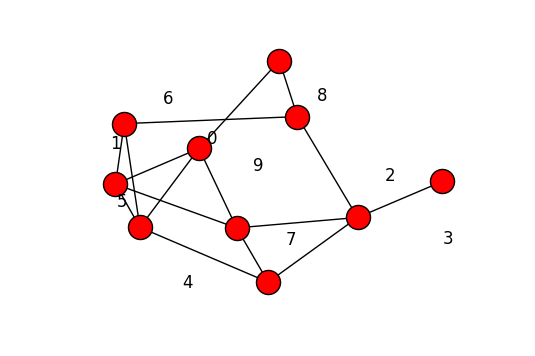

In [7]:
degs = g1.degree(g1)


Totally 5 distinct degrees
Min degree 1
Max degree 5
Mode degree 2
Avg degree 2.8
     1         2      3      4    5
1  0.0  0.250000  0.500  0.000  0.0
2  0.0  0.166667  0.625  0.875  1.0
3  0.0  0.000000  1.000  1.000  1.0
4  0.0  0.000000  0.000  1.000  1.0
5  0.0  0.000000  0.000  0.000  0.0
[((4, 6), {1: {1: [0]}, 3: {3: [0]}, 'fit': 768.0, 5: {1: [0]}}), ((4, 7), {0: {0: [0]}, 1: {2: [0]}, 'fit': 768.0, 4: {1: [0]}}), ((1, 4), {0: {0: [0]}, 1: {1: [0]}, 'fit': 768.0, 4: {0: [0]}}), ((5, 6), {1: {1: [1], 2: [1]}, 2: {0: [0]}, 'fit': 512.0}), ((5, 4), {1: {2: [0]}, 3: {0: [0]}, 'fit': 128.0}), ((1, 5), {1: {0: [0], 1: [1]}, 'fit': 64.0}), ((6, 7), {1: {2: [1], 3: [0]}, 'fit': 64.0}), ((4, 1), {3: {2: [0]}, 'fit': 16.0}), ((0, 5), {3: {0: [0]}, 'fit': 16.0}), ((4, 5), {'fit': 16.0, 5: {0: [0]}}), ((1, 8), {3: {2: [0]}, 'fit': 16.0}), ((3, 4), {3: {1: [0]}, 'fit': 16.0}), ((6, 9), {3: {3: [0]}, 'fit': 16.0})]
{0: {0: 1}, 1: {0: 1, 1: 2, 2: 2, 3: 1}, 2: {0: 1}, 3: {0: 1, 1: 1, 2: 1, 

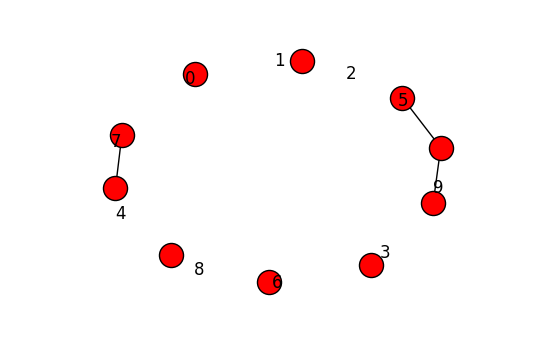

In [247]:
nx.draw_networkx_labels(g1,pos=nx.spring_layout(g1))
nx.draw(g1)
plt.show()

In [44]:
op2 = opacity.copy()

In [47]:
op2

,1,2,3,4
1,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [45]:
opacity[1][1] = 45.0

In [46]:
opacity

,1,2,3,4
1,45.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [33]:
deg_count, opacity = _init(g1, degs, verbose=True)

Totally 4 distinct degrees
Min degree 1
Max degree 4
Mode degree 4
Avg degree 3.2


In [9]:
inv_opacity = {}
opacity[opacity > 0.0] = 0.0

In [10]:
degs = list(g1.degree(g1).values())

In [11]:
calc_lopacity_matrix(g1, 2, deg_count, opacity, inv_opacity)

In [149]:
vil_edges = __get_violated(g1, 0.9, opacity, inv_opacity)

In [168]:
cand, inv_cand = __edge_to_path(g1, vil_edges)

In [169]:
cand

{0: {0: 1, 1: 2, 2: 2},
 1: {0: 2, 1: 1, 2: 1},
 2: {0: 3, 1: 2, 2: 1, 3: 3, 4: 1, 5: 2, 6: 1, 7: 3, 8: 3, 9: 3, 10: 3, 11: 2},
 3: {0: 1},
 4: {0: 1},
 5: {0: 2, 1: 1, 2: 3, 3: 1, 4: 2, 5: 2, 6: 1, 7: 1},
 6: {0: 2, 1: 1, 2: 1, 3: 4},
 7: {0: 2,
  1: 3,
  2: 1,
  3: 1,
  4: 3,
  5: 4,
  6: 3,
  7: 3,
  8: 2,
  9: 2,
  10: 2,
  11: 2,
  12: 3,
  13: 2,
  14: 3,
  15: 1},
 8: {0: 1, 1: 3, 2: 2, 3: 1, 4: 4, 5: 1, 6: 1, 7: 3, 8: 4, 9: 2, 10: 3, 11: 1},
 9: {0: 3, 1: 1, 2: 3},
 10: {0: 3, 1: 4}}

In [170]:
for k in cand:
    for k1 in cand[k]:
        cand[k][k1] = set(range(cand[k][k1]))

In [176]:
g1.remove_edges_from(r1)

In [175]:
r1 = get_edges_to_remove(g1, test_bucket)

{0: {0: 25, 1: 25}, 1: {0: 4, 1: 8}}
{0: {0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}}, 1: {0: {0, 1, 2, 3}, 1: {0, 1, 2, 3, 4, 5, 6, 7}}}


In [174]:
get_edges_to_remove(g1, viola)

{0: {0: 1, 1: 2, 2: 2}, 1: {0: 2, 1: 1, 2: 1}, 2: {0: 3, 1: 2, 2: 1, 3: 3, 4: 1, 5: 2, 6: 1, 7: 3, 8: 3, 9: 3, 10: 3, 11: 2}, 3: {0: 1}, 4: {0: 1}, 5: {0: 2, 1: 1, 2: 3, 3: 1, 4: 2, 5: 2, 6: 1, 7: 1}, 6: {0: 2, 1: 1, 2: 1, 3: 4}, 7: {0: 2, 1: 3, 2: 1, 3: 1, 4: 3, 5: 4, 6: 3, 7: 3, 8: 2, 9: 2, 10: 2, 11: 2, 12: 3, 13: 2, 14: 3, 15: 1}, 8: {0: 1, 1: 3, 2: 2, 3: 1, 4: 4, 5: 1, 6: 1, 7: 3, 8: 4, 9: 2, 10: 3, 11: 1}, 9: {0: 3, 1: 1, 2: 3}, 10: {0: 3, 1: 4}}
{0: {0: {0}, 1: {0, 1}, 2: {0, 1}}, 1: {0: {0, 1}, 1: {0}, 2: {0}}, 2: {0: {0, 1, 2}, 1: {0, 1}, 2: {0}, 3: {0, 1, 2}, 4: {0}, 5: {0, 1}, 6: {0}, 7: {0, 1, 2}, 8: {0, 1, 2}, 9: {0, 1, 2}, 10: {0, 1, 2}, 11: {0, 1}}, 3: {0: {0}}, 4: {0: {0}}, 5: {0: {0, 1}, 1: {0}, 2: {0, 1, 2}, 3: {0}, 4: {0, 1}, 5: {0, 1}, 6: {0}, 7: {0}}, 6: {0: {0, 1}, 1: {0}, 2: {0}, 3: {0, 1, 2, 3}}, 7: {0: {0, 1}, 1: {0, 1, 2}, 2: {0}, 3: {0}, 4: {0, 1, 2}, 5: {0, 1, 2, 3}, 6: {0, 1, 2}, 7: {0, 1, 2}, 8: {0, 1}, 9: {0, 1}, 10: {0, 1}, 11: {0, 1}, 12: {0, 1, 2}, 13:

[(15, 128),
 (15, 140),
 (15, 78),
 (15, 166),
 (15, 10),
 (15, 178),
 (15, 142),
 (15, 5),
 (15, 94),
 (15, 21),
 (15, 112),
 (15, 33),
 (15, 87),
 (15, 138),
 (15, 101),
 (10, 91),
 (15, 42),
 (15, 36),
 (15, 26),
 (15, 39),
 (15, 125),
 (138, 25),
 (15, 81),
 (15, 102),
 (10, 15),
 (25, 164),
 (78, 136),
 (15, 76),
 (39, 91),
 (78, 97),
 (15, 176),
 (91, 187),
 (91, 10),
 (4, 136),
 (164, 118),
 (5, 119),
 (128, 171),
 (125, 187),
 (25, 174),
 (166, 193),
 (166, 16),
 (128, 119),
 (10, 187),
 (112, 82),
 (78, 177)]

In [19]:
t1 = [p for p in nx.all_shortest_paths(g1,source=3,target=randint(1, 100))]
print(t1)

[[3, 1, 112, 7], [3, 11, 112, 7], [3, 11, 136, 7], [3, 151, 5, 7], [3, 151, 61, 7], [3, 126, 161, 7]]


In [20]:
t1_edges = to_edges(t1)
t2_edges = to_edges(t2)

In [21]:
t1_edges

[[(3, 1), (1, 112), (112, 7)],
 [(3, 11), (11, 112), (112, 7)],
 [(3, 11), (11, 136), (136, 7)],
 [(3, 151), (151, 5), (5, 7)],
 [(3, 151), (151, 61), (61, 7)],
 [(3, 126), (126, 161), (161, 7)]]

In [22]:
inv_edges = {}
for t_id in range(len(t1_edges)):
    for edge in t1_edges[t_id]:
        if edge not in inv_edges.keys():
            inv_edges[edge] = {}
            inv_edges[edge]['0'] = [t_id]
            inv_edges[edge]['1'] = []
            inv_edges[edge]['fit'] = 2
        else:
            inv_edges[edge]['0'].append(t_id)
            inv_edges[edge]['fit'] += 1 

In [24]:
for t_id in range(len(t2_edges)):
    for edge in t2_edges[t_id]:
        if edge not in inv_edges.keys():
            inv_edges[edge] = {}
            inv_edges[edge]['0'] = []
            inv_edges[edge]['1'] = [t_id]
            inv_edges[edge]['fit'] = 2
        else:
            inv_edges[edge]['1'].append(t_id)
            inv_edges[edge]['fit'] = (len(inv_edges[edge]['0'])+1) * (len(inv_edges[edge]['1'])+1)

In [26]:
sorted_edges = sorted(inv_edges.items(), key=lambda x: x[1]['fit'], reverse=True)

In [152]:
vil_edges

[[(4, 109), (78, 109), (109, 136)],
 [(4, 78), (4, 136), (78, 136)],
 [(7, 25),
  (7, 91),
  (25, 79),
  (25, 118),
  (25, 123),
  (25, 162),
  (25, 165),
  (79, 91),
  (91, 118),
  (91, 123),
  (91, 162),
  (91, 165)],
 [(25, 91)],
 [(15, 109)],
 [(3, 15),
  (15, 38),
  (15, 47),
  (15, 49),
  (15, 52),
  (15, 68),
  (15, 184),
  (15, 199)],
 [(15, 29), (15, 62), (15, 114), (15, 119)],
 [(0, 15),
  (14, 15),
  (15, 31),
  (15, 36),
  (15, 40),
  (15, 45),
  (15, 55),
  (15, 77),
  (15, 97),
  (15, 107),
  (15, 117),
  (15, 139),
  (15, 171),
  (15, 186),
  (15, 188),
  (15, 193)],
 [(10, 15),
  (15, 16),
  (15, 61),
  (15, 81),
  (15, 82),
  (15, 134),
  (15, 140),
  (15, 157),
  (15, 172),
  (15, 173),
  (15, 187),
  (15, 197)],
 [(4, 15), (15, 78), (15, 136)],
 [(15, 25), (15, 91)]]

In [158]:
get_edges_to_remove(g1, test_bucket)

[(112, 12),
 (21, 12),
 (33, 12),
 (173, 12),
 (194, 12),
 (149, 12),
 (142, 12),
 (7, 149),
 (7, 190),
 (23, 12),
 (190, 12),
 (7, 112),
 (96, 12),
 (7, 21),
 (47, 12),
 (83, 12)]

In [145]:
test_bucket = [[(4, 12), (5,12)],[(7,12), (3,12)]]

TypeError: unsupported operand type(s) for -: 'int' and 'set'

In [136]:
l1, l2 = __edge_to_path(g1, test_bucket)

In [137]:
get_edges_to_remove(g1, )

{0: {0: 25, 1: 25}, 1: {0: 4, 1: 8}}

In [139]:
__set_fit_func(l2)
sorted_edges = sorted(l2.items(), key=lambda x: (x[1]['fit'], random.random()), reverse=True)
sorted_edges

[((112, 12),
  {0: {0: [8, 9], 1: [7, 8, 9, 10, 11]},
   1: {0: [1], 1: [2, 3]},
   'fit': 13824.0}),
 ((33, 12), {0: {0: [0, 1], 1: [15, 16, 17]}, 1: {1: [5, 6]}, 'fit': 2304.0}),
 ((21, 12),
  {0: {0: [13, 14], 1: [2, 3, 4, 5, 6]}, 1: {0: [2]}, 'fit': 2304.0}),
 ((149, 12), {0: {0: [2, 3, 4], 1: [13, 14]}, 1: {0: [3]}, 'fit': 1536.0}),
 ((173, 12), {0: {0: [5, 6, 7], 1: [22, 23]}, 1: {1: [7]}, 'fit': 1536.0}),
 ((194, 12), {0: {0: [21, 22, 23], 1: [20, 21]}, 1: {1: [4]}, 'fit': 1536.0}),
 ((142, 12), {0: {0: [19], 1: [19]}, 1: {1: [1]}, 'fit': 512.0}),
 ((190, 12), {0: {1: [12]}, 1: {0: [0]}, 'fit': 128.0}),
 ((7, 149), {0: {1: [13]}, 1: {0: [3]}, 'fit': 128.0}),
 ((7, 112), {0: {1: [8]}, 1: {0: [1]}, 'fit': 128.0}),
 ((7, 190), {0: {1: [12]}, 1: {0: [0]}, 'fit': 128.0}),
 ((7, 21), {0: {1: [3]}, 1: {0: [2]}, 'fit': 128.0}),
 ((23, 12), {0: {0: [10, 11, 12], 1: [24]}, 'fit': 128.0}),
 ((96, 12), {0: {0: [20]}, 1: {1: [0]}, 'fit': 128.0}),
 ((47, 12), {0: {0: [24], 1: [0, 1]}, 'fit': 

KeyError: 'fit'

In [87]:
l1, l2 = __edge_to_path(g1, vil_edges)

In [117]:
l1

{0: {0: 25, 1: 25}, 1: {0: 4, 1: 8}}

In [95]:
sorted_edges

[((112, 12),
  {0: {0: [8, 9], 1: [7, 8, 9, 10, 11]},
   1: {0: [1], 1: [2, 3]},
   'fit': 13824.0}),
 ((33, 12), {0: {0: [0, 1], 1: [15, 16, 17]}, 1: {1: [5, 6]}, 'fit': 2304.0}),
 ((21, 12),
  {0: {0: [13, 14], 1: [2, 3, 4, 5, 6]}, 1: {0: [2]}, 'fit': 2304.0}),
 ((149, 12), {0: {0: [2, 3, 4], 1: [13, 14]}, 1: {0: [3]}, 'fit': 1536.0}),
 ((173, 12), {0: {0: [5, 6, 7], 1: [22, 23]}, 1: {1: [7]}, 'fit': 1536.0}),
 ((194, 12), {0: {0: [21, 22, 23], 1: [20, 21]}, 1: {1: [4]}, 'fit': 1536.0}),
 ((142, 12), {0: {0: [19], 1: [19]}, 1: {1: [1]}, 'fit': 512.0}),
 ((7, 149), {0: {1: [13]}, 1: {0: [3]}, 'fit': 128.0}),
 ((96, 12), {0: {0: [20]}, 1: {1: [0]}, 'fit': 128.0}),
 ((23, 12), {0: {0: [10, 11, 12], 1: [24]}, 'fit': 128.0}),
 ((7, 112), {0: {1: [8]}, 1: {0: [1]}, 'fit': 128.0}),
 ((7, 21), {0: {1: [3]}, 1: {0: [2]}, 'fit': 128.0}),
 ((7, 190), {0: {1: [12]}, 1: {0: [0]}, 'fit': 128.0}),
 ((190, 12), {0: {1: [12]}, 1: {0: [0]}, 'fit': 128.0}),
 ((47, 12), {0: {0: [24], 1: [0, 1]}, 'fit': 

In [123]:
rem_edges = []
buckets = set([0, 1])
finished = False
s_id = 0
while not finished:
    s = sorted_edges[s_id]
    edge = s[0]
    bucket_r = s[1]
    if 'fit' in s[1].keys():
        del(s[1]['fit'])
    for b_id in s[1].keys():
        for c_id in s[1][b_id].keys():
            l1[b_id][c_id] =  l1[b_id][c_id] - set(s[1][b_id][c_id])
    finished = True
    for b_id in l1.keys():
        completed = False
        for c_id in l1[b_id].keys():
            if len(l1[b_id][c_id]) == 0:
                completed = True
        if completed == False:
            finished = False
    rem_edges.append(edge)
    s_id += 1
    
            

In [124]:
rem_edges

[(112, 12),
 (21, 12),
 (33, 12),
 (194, 12),
 (173, 12),
 (149, 12),
 (142, 12),
 (7, 149),
 (190, 12),
 (96, 12),
 (7, 190),
 (23, 12),
 (7, 21),
 (7, 112),
 (47, 12),
 (83, 12)]

In [125]:
l1

{0: {0: {15, 16}, 1: set()}, 1: {0: set(), 1: set()}}

In [121]:
sorted_edges[0][1][0].values()

dict_values([[8, 9], [7, 8, 9, 10, 11]])

In [106]:
sorted_edges[0][1]['fit'] = 0

In [111]:
l1

{0: {0: 25, 1: 25}, 1: {0: 4, 1: 8}}

In [118]:
for k in l1:
    for k1 in l1[k]:
        l1[k][k1] = set(range(l1[k][k1]))

In [119]:
l1

{0: {0: {0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24},
  1: {0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24}},
 1: {0: {0, 1, 2, 3}, 1: {0, 1, 2, 3, 4, 5, 6, 7}}}

In [66]:
t1 = [p for p in nx.all_shortest_paths(g1,source=3,target=12)]
print(t1)

[[3, 1, 96, 12], [3, 1, 142, 12], [3, 1, 112, 12], [3, 11, 112, 12], [3, 103, 194, 12], [3, 26, 33, 12], [3, 126, 33, 12], [3, 26, 173, 12]]


In [54]:
t2 = [p for p in nx.all_shortest_paths(g1,source=15,target=171)]
print(t2)

[[15, 128, 171], [15, 101, 171], [15, 10, 171]]


In [40]:
l1

[[(4, 109), (78, 109), (109, 136)], [(4, 78), (4, 136), (78, 136)], [(7, 25), (7, 91), (25, 79), (25, 118), (25, 123), (25, 162), (25, 165), (79, 91), (91, 118), (91, 123), (91, 162), (91, 165)], [(25, 91)], [(15, 109)], [(3, 15), (15, 38), (15, 47), (15, 49), (15, 52), (15, 68), (15, 184), (15, 199)], [(15, 29), (15, 62), (15, 114), (15, 119)], [(0, 15), (14, 15), (15, 31), (15, 36), (15, 40), (15, 45), (15, 55), (15, 77), (15, 97), (15, 107), (15, 117), (15, 139), (15, 171), (15, 186), (15, 188), (15, 193)], [(10, 15), (15, 16), (15, 61), (15, 81), (15, 82), (15, 134), (15, 140), (15, 157), (15, 172), (15, 173), (15, 187), (15, 197)], [(4, 15), (15, 78), (15, 136)], [(15, 25), (15, 91)]]


In [46]:
l1, l2 = __edge_to_path(g1, vil_edges)

In [47]:
l1

{0: {0: 1, 1: 2, 2: 2},
 1: {0: 2, 1: 1, 2: 1},
 2: {0: 3, 1: 2, 2: 1, 3: 3, 4: 1, 5: 2, 6: 1, 7: 3, 8: 3, 9: 3, 10: 3, 11: 2},
 3: {0: 1},
 4: {0: 1},
 5: {0: 2, 1: 1, 2: 3, 3: 1, 4: 2, 5: 2, 6: 1, 7: 1},
 6: {0: 2, 1: 1, 2: 1, 3: 4},
 7: {0: 2,
  1: 3,
  2: 1,
  3: 1,
  4: 3,
  5: 4,
  6: 3,
  7: 3,
  8: 2,
  9: 2,
  10: 2,
  11: 2,
  12: 3,
  13: 2,
  14: 3,
  15: 1},
 8: {0: 1, 1: 3, 2: 2, 3: 1, 4: 4, 5: 1, 6: 1, 7: 3, 8: 4, 9: 2, 10: 3, 11: 1},
 9: {0: 3, 1: 1, 2: 3},
 10: {0: 3, 1: 4}}

In [425]:
sorted_edges[0][0]

(54, 8)

In [396]:
num_buckets = [set()]
for k in inv_edges:
    for i in range(num_buckets):
        inv_edges[k][0]
    inv_edges[k][0]
    

{(8, 38): [[], [4]],
 (8, 97): [[11], []],
 (8, 104): [[14], [7]],
 (9, 57): [[], [16]],
 (9, 141): [[24], []],
 (14, 42): [[], [8]],
 (14, 46): [[6], []],
 (14, 97): [[12], []],
 (16, 60): [[23], []],
 (19, 77): [[16], []],
 (19, 81): [[17], []],
 (19, 183): [[18], []],
 (38, 10): [[], [4, 5, 6]],
 (39, 46): [[8], []],
 (39, 143): [[22], [15]],
 (40, 60): [[20, 21], []],
 (42, 10): [[], [8, 9, 10]],
 (46, 60): [[5, 6, 7, 8, 9, 10], []],
 (50, 46): [[10], []],
 (54, 8): [[11, 14], [4, 7]],
 (54, 9): [[24], [16]],
 (54, 14): [[6, 12], [8]],
 (54, 19): [[16, 17, 18], []],
 (54, 39): [[8, 22], [15]],
 (54, 50): [[10], []],
 (54, 62): [[26, 28, 29], []],
 (54, 67): [[4], []],
 (54, 73): [[15], []],
 (54, 86): [[20], []],
 (54, 106): [[23], [6]],
 (54, 121): [[27], []],
 (54, 127): [[3, 19, 21], [3]],
 (54, 136): [[9], [14]],
 (54, 142): [[13], [5, 12]],
 (54, 148): [[], [11]],
 (54, 157): [[], [9]],
 (54, 173): [[], [10, 13]],
 (54, 179): [[2], [2]],
 (54, 185): [[1, 7], [1]],
 (54, 188): 

In [386]:
from itertools import chain
set(chain.from_iterable(t1_edges)) & set(chain.from_iterable(t2_edges))

{(8, 104),
 (39, 143),
 (54, 8),
 (54, 9),
 (54, 14),
 (54, 39),
 (54, 106),
 (54, 127),
 (54, 136),
 (54, 142),
 (54, 179),
 (54, 185),
 (54, 194),
 (127, 198),
 (179, 198),
 (185, 198),
 (194, 198)}

In [403]:
set([])

set()

In [376]:
set(t1_edges[0]) & set(t2_edges[0]) 

{(54, 194), (194, 198)}

In [357]:
for i in temp:
    c1 = Counter(temp[i])
    print(c1.most_common(2))

[(19, 3), (62, 3)]
[(46, 6), (198, 4)]


[[54, 194, 198, 10], [54, 185, 198, 10], [54, 179, 198, 10], [54, 127, 198, 10], [54, 8, 38, 10], [54, 142, 38, 10], [54, 106, 38, 10], [54, 8, 104, 10], [54, 14, 42, 10], [54, 157, 42, 10], [54, 173, 42, 10], [54, 148, 117, 10], [54, 142, 96, 10], [54, 173, 96, 10], [54, 136, 96, 10], [54, 39, 143, 10], [54, 9, 57, 10]]


In [366]:
N = len(t2[0])
temp2 = {}
for t in t2:
    for i in range(1, N-1):
        if i not in temp2.keys():
            temp2[i] = [t[i]]
        else:
            temp2[i].append(t[i])

In [368]:
set(temp2[1]) & set(temp[1])

{8, 9, 14, 39, 106, 127, 136, 142, 179, 185, 194}

In [369]:
set(temp2[2]) & set(temp[2])

{104, 143, 198}

In [ ]:
buckets = []
rem_count = {}
rem_ids = {}
for t_id in range(len(t1_edges)):
    bucket = []
    for edge in t1_edges[t_id]:
        if edge not in rem_cand:
            rem_ids[edge] = [t_id]
        else:
            rem_ids[edge].append(t_id)
        
